In [280]:
from sympy import *
from sympy.plotting import plot3d

u, lamda_0, lamda_1, lamda_2, q = symbols('u lamda_0 lamda_1 lamda_2 q')


In [281]:
#Tsallis Entropy distribution for a fixed mean velocity and shape-factor
#f = (lamda_0*(u-lamda_1)*(u-lamda_2))**(1/(q-1))

f = lamda_0*((u+lamda_1)**2 + lamda_2)**(1/(q-1))
f = f.subs(q,3) #Tsallis coefficient of 3
print('for q = 3, f(u) = ')
pprint(f)


for q = 3, f(u) = 
      ________________
     ╱              2 
λ₀⋅╲╱  λ₂ + (λ₁ + u)  


In [282]:
#applying constraints:
eq0 = integrate(f,(u,0,1))
pprint(eq0)

     ⎛               _________                   ⎞      ⎛            _________
     ⎜              ╱   2                ⎛  λ₁  ⎞⎟      ⎜           ╱         
     ⎜     ____    ╱  λ₁         λ₂⋅asinh⎜──────⎟⎟      ⎜  ____    ╱      (λ₁ 
     ⎜λ₁⋅╲╱ λ₂ ⋅  ╱   ─── + 1            ⎜  ____⎟⎟      ⎜╲╱ λ₂ ⋅  ╱   1 + ────
     ⎜          ╲╱     λ₂                ⎝╲╱ λ₂ ⎠⎟      ⎜       ╲╱            
- λ₀⋅⎜──────────────────────── + ────────────────⎟ + λ₀⋅⎜─────────────────────
     ⎝           2                      2        ⎠      ⎝                 2   

______                            ⎞
    2                     ⎛λ₁ + 1⎞⎟
+ 1)              λ₂⋅asinh⎜──────⎟⎟
───── ⋅(λ₁ + 1)           ⎜  ____⎟⎟
λ₂                        ⎝╲╱ λ₂ ⎠⎟
─────────────── + ────────────────⎟
                         2        ⎠


In [283]:
#normalizing:
f_copy = f
f = simplify(f/eq0)
pprint(f)

                                              ________________                
                                             ╱              2                 
                                        -2⋅╲╱  λ₂ + (λ₁ + u)                  
──────────────────────────────────────────────────────────────────────────────
               __________               ________________                      
              ╱   2                    ╱              2                       
     ____    ╱  λ₁  + λ₂      ____    ╱  λ₂ + (λ₁ + 1)                      ⎛ 
λ₁⋅╲╱ λ₂ ⋅  ╱   ────────  - ╲╱ λ₂ ⋅  ╱   ────────────── ⋅(λ₁ + 1) + λ₂⋅asinh⎜─
          ╲╱       λ₂              ╲╱          λ₂                           ⎜ 
                                                                            ⎝╲

                         
                         
                         
─────────────────────────
                         
                         
 λ₁  ⎞           ⎛λ₁ + 1⎞
─────⎟ - λ₂⋅asinh⎜──────⎟
 

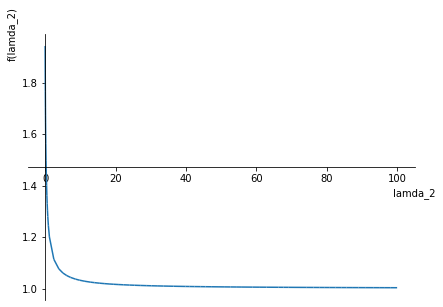

                  ________              
             -2⋅╲╱ λ₂ + 1               
────────────────────────────────────────
             ________                   
    ____    ╱ λ₂ + 1            ⎛  1   ⎞
- ╲╱ λ₂ ⋅  ╱  ──────  - λ₂⋅asinh⎜──────⎟
         ╲╱     λ₂              ⎜  ____⎟
                                ⎝╲╱ λ₂ ⎠


In [284]:
#plotting:
f_boundary = f.subs(u,1).subs(lamda_1,0)
plot(f_boundary,(lamda_2,0.01,100))
pprint(f_boundary)





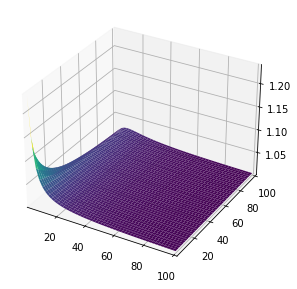

In [285]:
#3D plot of maximum:
f_max = f.subs(u,1)
plot3d(f_max,(lamda_1,1,100),(lamda_2,1,100))

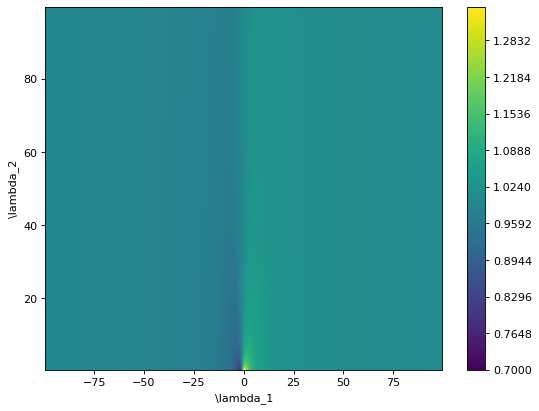

In [286]:
#lambdifying for numpy:
import numpy as np
import matplotlib.pyplot as plt
f_np = lambdify([lamda_1,lamda_2],f_max)
max_val = 100
ds = max_val/100
xx,zz = np.meshgrid(np.arange(-max_val+ds/2,max_val,ds),np.arange(ds/2,max_val,ds))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(xx,zz,f_np(xx,zz),levels = 1000)
plt.xlabel('\lambda_1')
plt.ylabel('\lambda_2')
plt.colorbar()
